In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



In [323]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [324]:
df.size

61320

In [325]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [326]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [327]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

condition for dates
convert the age in fraction OR
Give description

In [328]:
df.isna() .sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [329]:
df. shape

(5110, 12)

In [330]:
df.nunique

<bound method DataFrame.nunique of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urb

In [331]:
df.duplicated().sum()

np.int64(0)

#The DF is clean the only thing that needs to be cleaned is the BMI missing values
#I wil be using the median to fill the 201 missing values.


In [332]:
df["bmi"]=df["bmi"].fillna(df["bmi"].median())

#Here we can see we have filled the NA values with the median

In [333]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#By using univariate analysis will show us any outliers, skewed distributions, issues and so on. 

#We are using the three numeric values with a histogram it will show us the outliers, shape, clusters and so on.
 
#subplot will divide it into 1 row and 3 columns and give it a postion in the output. EX the age will be in postion one so 
#it will appear in first place. 


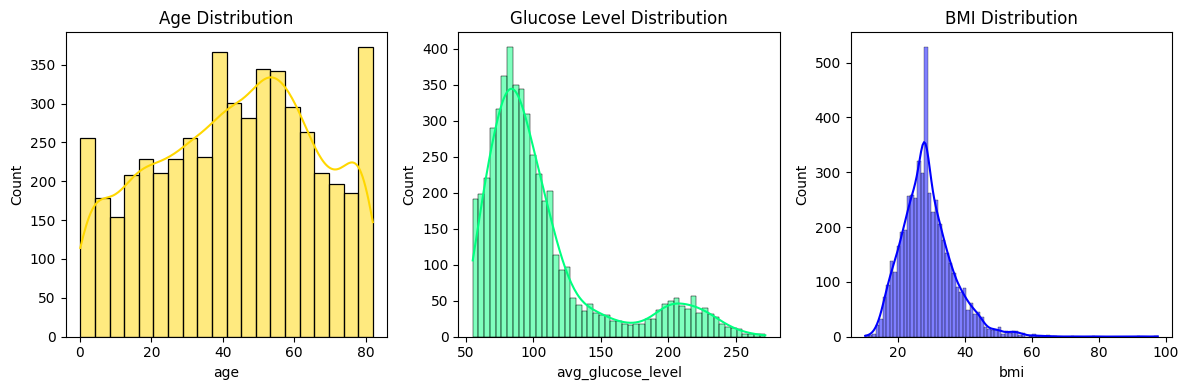

In [334]:
plt.figure(figsize=(12,4)) 
plt.subplot(1,3,1) 
sns.histplot(df['age'], kde=True, color=("gold"), edgecolor=("black")) 
plt.title('Age Distribution') 

plt.subplot(1,3,2) 
sns.histplot(df['avg_glucose_level'], kde=True, color=("springgreen"), edgecolor=("black")) 
plt.title('Glucose Level Distribution') 

plt.subplot(1,3,3) 
sns.histplot(df['bmi'], kde=True, color=("blue"), edgecolor=("black")) 
plt.title('BMI Distribution') 
plt.tight_layout() 


#younger folks are less likely to have a stroke
#right skewed more older adults liely to have a stroke
#40-60 years of age we see a high density 
#
#Gulucose level high density in 80 to 100 which would be normal 
#the higher gulucose level might be a factor in having a stroke

#25-30 bmi has a very high point showing high bmi numbers normal range is 18 to 25
#right skew shows some have very high bmi

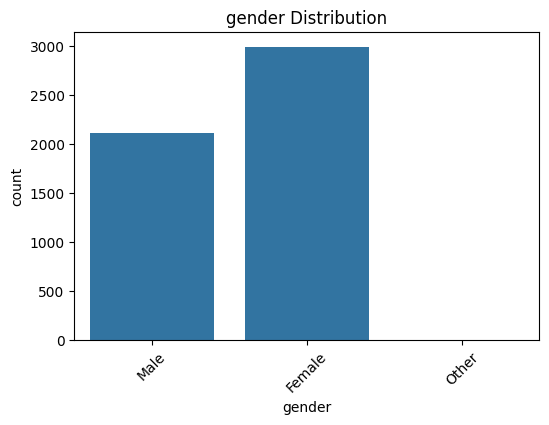

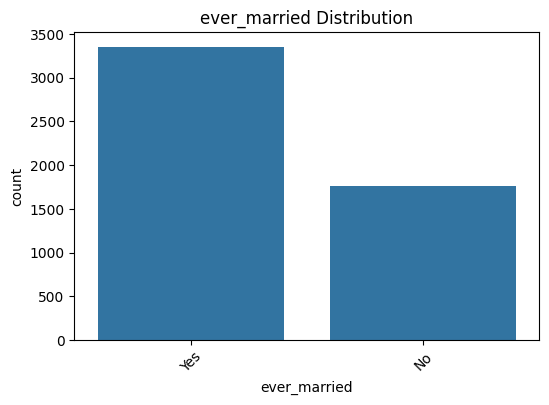

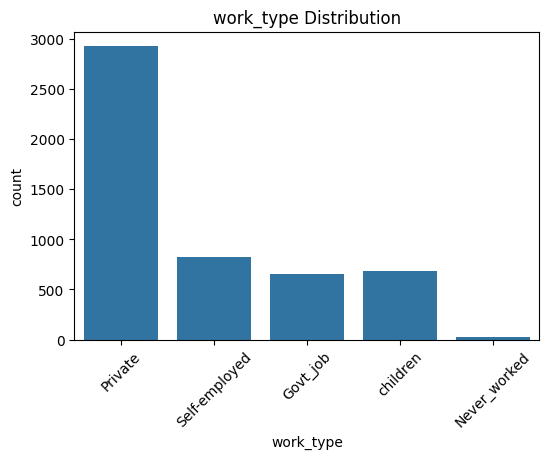

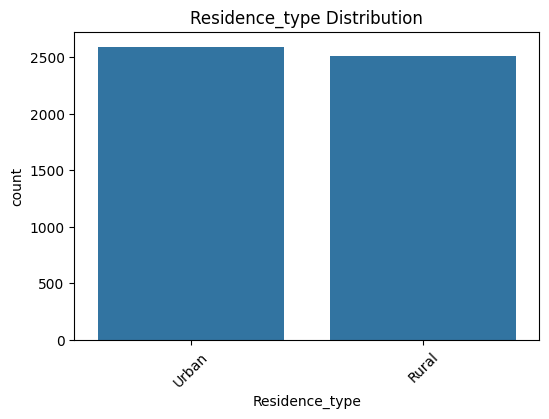

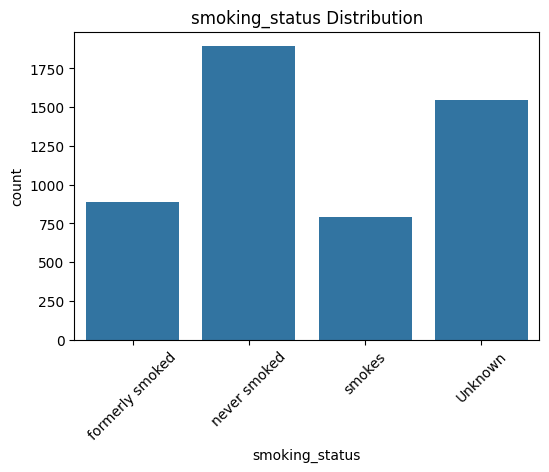

In [335]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status'] 
for col in categorical_cols: 
    plt.figure(figsize=(6,4)) 
    sns.countplot(data=df, x=col) 
    plt.title(f'{col} Distribution') 
    plt.xticks(rotation=45) 

#I have more female than man. It is something to take into account when comparing down the line. 

<Axes: xlabel='gender'>

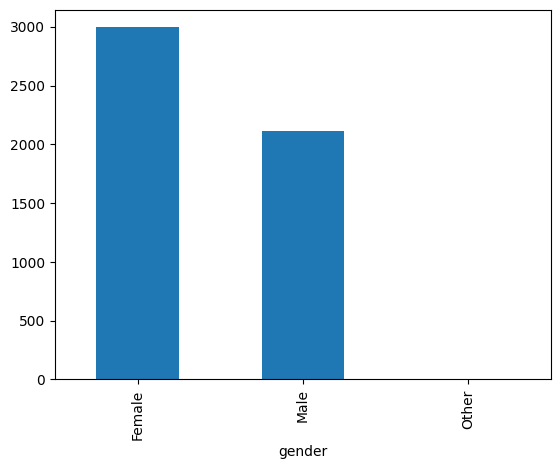

In [336]:
df['gender'].value_counts().plot(kind='bar')


In [337]:
df. dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<Axes: xlabel='smoking_status'>

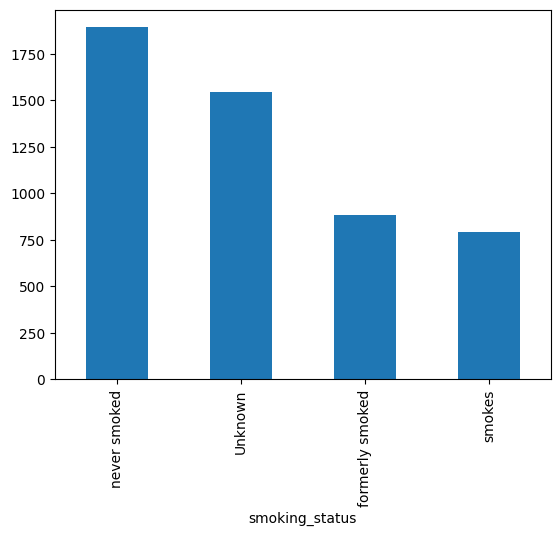

In [338]:
df["smoking_status"].value_counts().plot(kind="bar")


<Axes: xlabel='ever_married'>

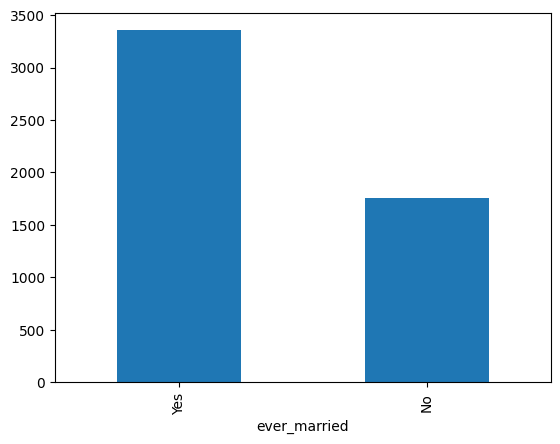

In [339]:
df["ever_married"].value_counts().plot(kind="bar")

#work type for private work has close to 3000. The raw counts will be not for future comparision but %

<Axes: xlabel='work_type'>

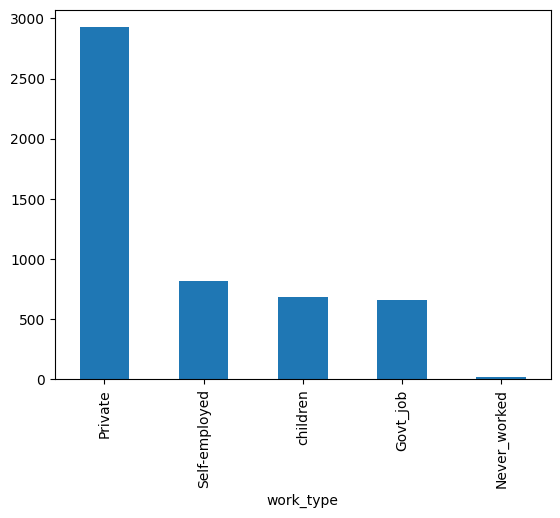

In [340]:
df["work_type"].value_counts().plot(kind="bar")

<Axes: xlabel='Residence_type'>

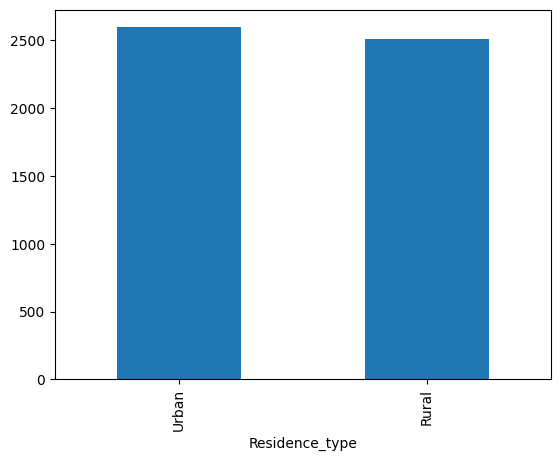

In [341]:
df["Residence_type"].value_counts().plot(kind="bar")

0=Never had a stroke
1=Had a stroke

#

In [342]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

.map lets us rename the 0 and 1 to whatever name given. To make it readable we will rename it to stroke and no stroke


<Axes: xlabel='stroke'>

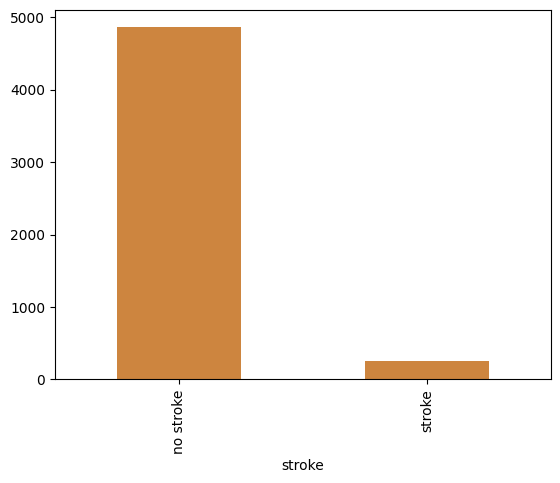

In [344]:
df["stroke"].map({0: "no stroke", 1: "stroke"}).value_counts().plot(kind="bar", color=("peru"))

#this will group the gender into 3 cat.
#.mean will be the number of people that had a stroke then we converte it into % by *100

Text(0.5, 1.0, 'Stroke Percentage Rate by Gender')

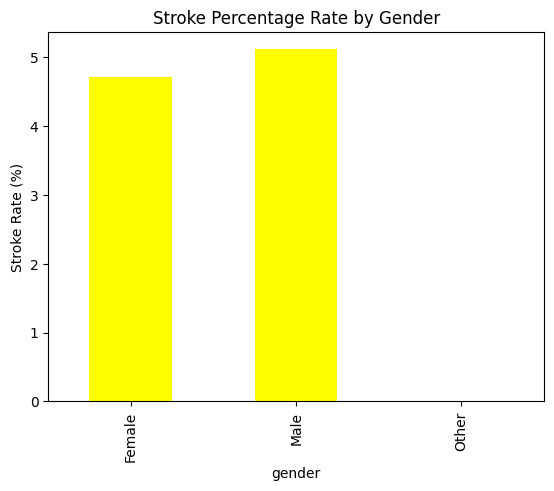

In [ ]:
(df.groupby('gender')['stroke'].mean() * 100).plot(kind='bar',color=("yellow"))
plt.ylabel('Stroke Rate (%)') 
plt.title("STROKE PERCENTAGE RATE BY GENDER")

#We see heavy set of data in the age 60 t0 80 that had a stroke. Older age plays a role in having a stroke.
#Those who do not have a stroke cover the eniter age group including kids. 
#The median line for people with stroke is much higher. 

Text(0, 0.5, 'Age group by stroke status')

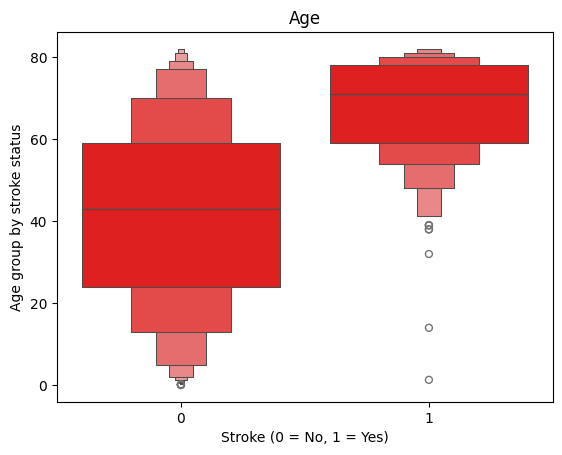

In [ ]:
sns.boxenplot(data=df, x="stroke", y="age", color="red")
plt.title("Age")
plt.xlabel("Stroke (0 = No, 1 = Yes") 
plt.ylabel("AGE BY STROKE STATUS")




#People with strokes shows them having a higher level of gulucose.
#lower lovel of gulucose is shown in those that do not have a stroke.
#cluster 50 to 120 gulucose level for those with no strokes.

Text(0, 0.5, 'GULUCOSE LEVEL')

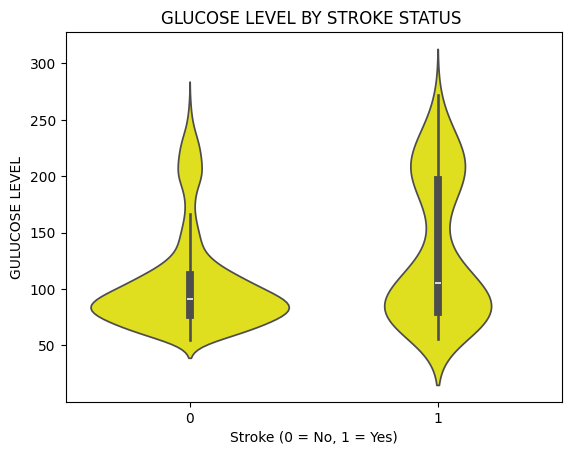

In [ ]:
sns.violinplot(data=df, x="stroke", y="avg_glucose_level", color="yellow")
plt.xlabel('Stroke (0 = No, 1 = Yes)') 
plt.title("GLUCOSE LEVEL BY STROKE STATUS ")
plt.ylabel("GULUCOSE LEVEL")

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

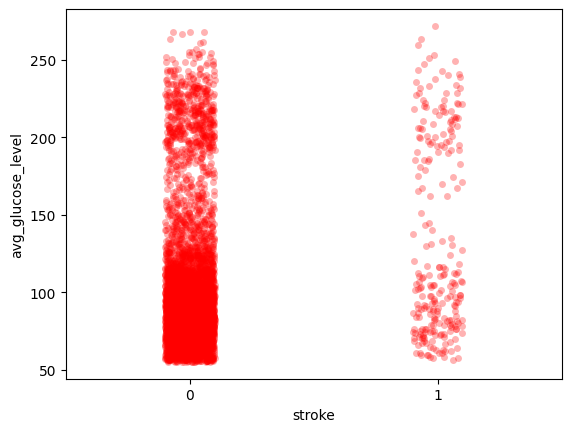

In [ ]:
sns.stripplot(data=df, x="stroke", y="avg_glucose_level", color="red", alpha=0.3)

Text(0, 0.5, 'GULUCOSE LEVEL')

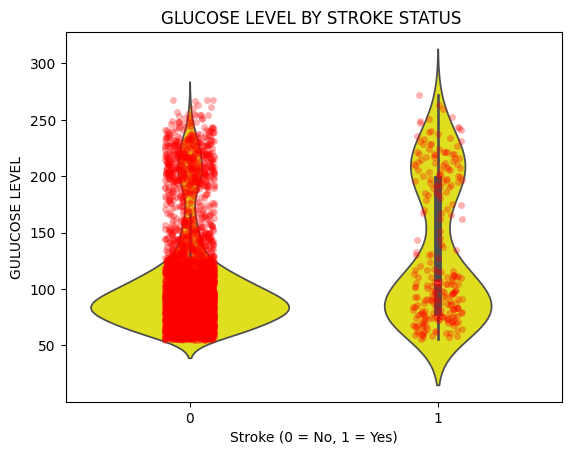

In [ ]:
sns.violinplot(data=df, x="stroke", y="avg_glucose_level", color="yellow")
sns.stripplot(data=df, x="stroke", y="avg_glucose_level", color="red", alpha=0.3)
plt.xlabel('Stroke (0 = No, 1 = Yes)') 
plt.title("GLUCOSE LEVEL BY STROKE STATUS ")
plt.ylabel("GULUCOSE LEVEL")


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#The BMI median for stroke cases is lower and the no stroke cases the BMI median seems to be in the middle. 
#stroke cases tend to have around the same BMI vs the BMI with no stroke is more spread out

Text(0.5, 1.0, 'BMI BY STROKE STATUS')

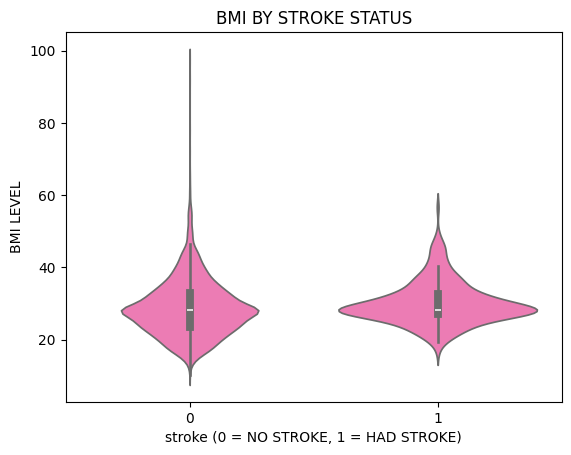

In [ ]:
sns.violinplot(data=df, x="stroke", y="bmi", color="hotpink") 
plt.xlabel('stroke (0 = NO STROKE, 1 = HAD STROKE)') 
plt.ylabel("BMI LEVEL") 
plt.title("BMI BY STROKE STATUS")

#categorical 

#Almost all of the people without hypertension had a stroke.
#The people with hypertension had a higher chance for a stroke.
#In this data we see only a few pople had hypertension but out of those having a stroke was higher in that group. 

Text(0.5, 1.0, 'Hypertension vs Stroke')

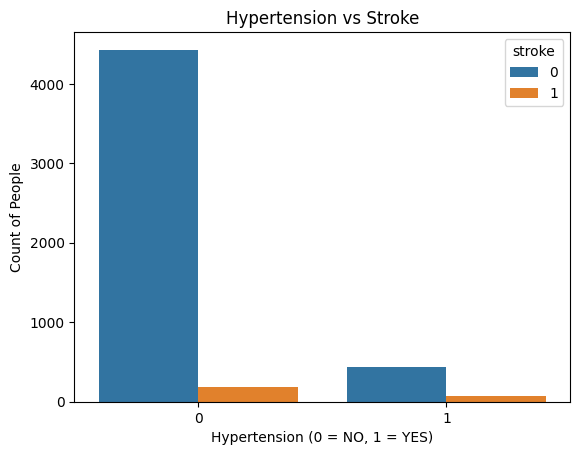

In [ ]:
sns.countplot(data=df, x="hypertension", hue="stroke") 
plt.xlabel("Hypertension (0 = NO, 1 = YES)") 
plt.ylabel("THE NUMBER OF PEOPLE ") 
plt.title("HYPERTENSION VS STROKE")



#Those who are married get more strokes than the once that arent married. 

Text(0.5, 1.0, 'MARRIED LEADS TO STROKE')

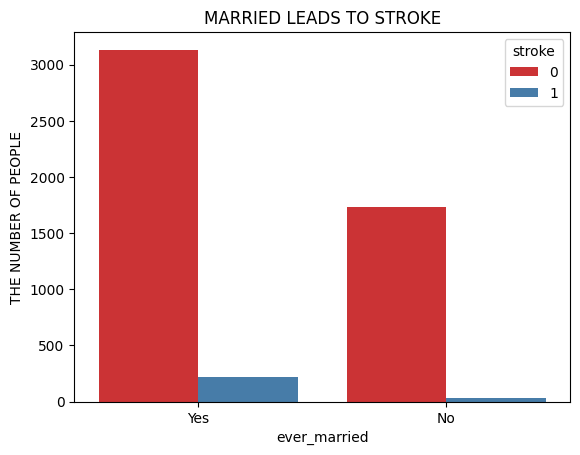

In [ ]:
sns.countplot(data=df, x="ever_married", hue="stroke", palette="Set1")
plt.ylabel("THE NUMBER OF PEOPLE")
plt.title("MARRIED LEADS TO STROKE")

Text(0, 0.5, 'AGE')

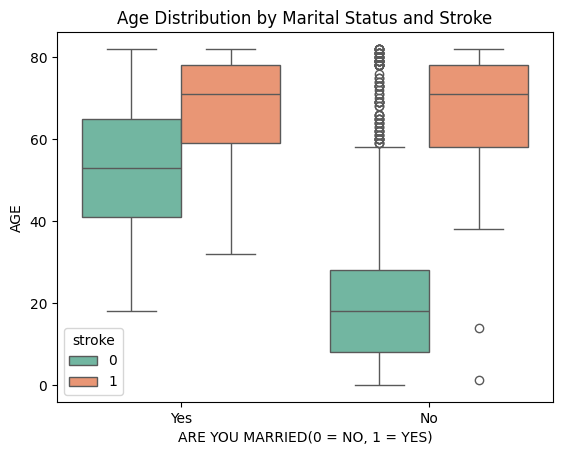

In [ ]:
sns.boxplot(data=df, x="ever_married", y="age", hue="stroke", palette="Set2")
plt.title("Age Distribution by Marital Status and Stroke")
plt.xlabel("ARE YOU MARRIED(0 = NO, 1 = YES)") 
plt.ylabel("AGE")

Text(0.5, 0, 'DO YOU SMOKE?(0=NO, 1=YES)')

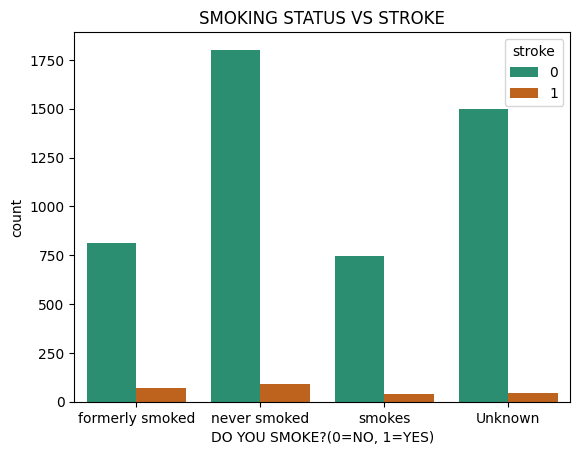

In [ ]:
sns.countplot(data=df, x="smoking_status", hue="stroke", palette="Dark2")
plt.title("SMOKING STATUS VS STROKE")
plt.xlabel("DO YOU SMOKE?(0=NO, 1=YES)")
